In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
from matplotlib import pyplot as plt
import time
import sys
from PIL import Image
from itertools import product


2023-11-30 00:07:04.832979: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Step 1: Get all .npy file paths in a folder
folder_path = 'MRNet-v1.0/'  # Update this with the path to your folder containing .npy files
file_names = os.listdir(folder_path)
file_paths = [os.path.join(folder_path, file_name) for file_name in file_names if file_name.endswith('.npy')]


File Name: testing-minimized-axial/0032.npy
Num slices: 39
(154, 154)


Text(0.5, 1.0, '0th slice of 0th image')

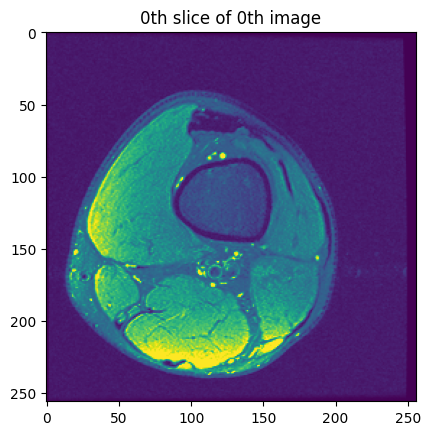

In [3]:
#test using single image (file_paths[0])

vol = np.load(file_paths[1])
print(f"File Name: {file_paths[0]}")

nSlices = np.size(vol,0)#num of slices in image


print("Num slices:", nSlices)
image = Image.fromarray(vol[2,:,:])
w, h = image.size
image = image.crop((w//5,h//5 , w-w//5, h-h//5))
image.show()
print(image.size)



plt.imshow(vol[0,:,:])
plt.title("0th slice of 0th image")


File Name: testing-minimized-axial/0032.npy
Total Num Slices: 39


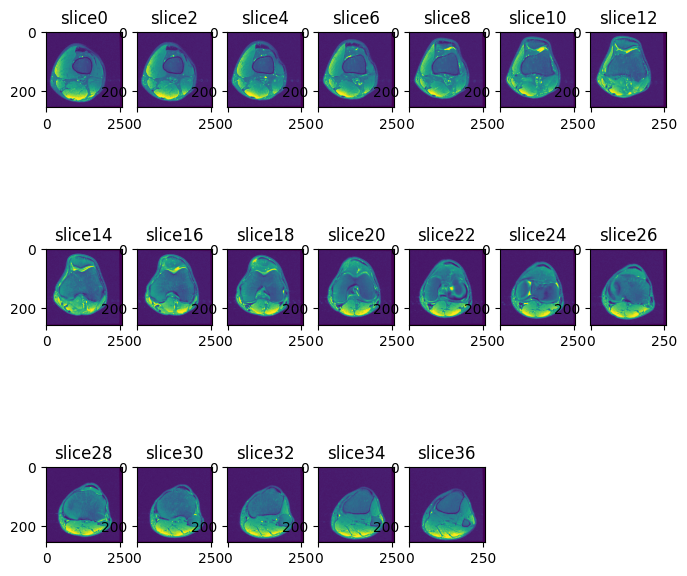

In [4]:
#Display first 15 slices
print(f"File Name: {file_paths[0]}")
print("Total Num Slices:", nSlices)


fig = plt.figure(figsize=(8, 8))

columns = int(nSlices/5)
rows = 3
for i in range(int(nSlices/2)):
    # plt.imshow(image_data0[i,:,:])
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(vol[i*2,:,:]) #skipping 1 slice (so showing slices 0,2,4,6,8... to show more detail
    plt.title("slice" + str(i*2))
    



In [5]:
#combine all slices from single file (3d volume) into a single image (will then be doing this for every single file)
#determine size of images:
print("Dimension of volume:",vol.shape) 


#append all slices of volume into a list of images 
slices= []
for i in range(nSlices):
    image = Image.fromarray(vol[i,:,:])
    # image = image.resize((128,128), 1)# can resize images to make smaller and reduce compute
    w, h = image.size
    # print(w-w//6,h//6)
    image = image.crop((w//6,h//6 , w-w//6, h-h//6))
    slices.append(image)
    
#save a gif of the slices (just for fun)
# images[0].save('images.gif', 
#                save_all = True, append_images = images[1:], 
#                optimize = False, duration = 10)     


#combine all slices into a single grid image: "grid"
def pil_grid(images, max_horiz=np.iinfo(int).max):
    n_images = len(images)
    n_horiz = min(n_images, max_horiz)
    h_sizes, v_sizes = [0] * n_horiz, [0] * (n_images // n_horiz)
    for i, im in enumerate(images):
        h, v = i % n_horiz, i // n_horiz
        h_sizes[h] = max(h_sizes[h], im.size[0])
        v_sizes[v] = max(v_sizes[v], im.size[1])
    h_sizes, v_sizes = np.cumsum([0] + h_sizes), np.cumsum([0] + v_sizes)
    im_grid = Image.new('RGB', (h_sizes[-1], v_sizes[-1]), color='white')
    for i, im in enumerate(images):
        im_grid.paste(im, (h_sizes[i % n_horiz], v_sizes[i // n_horiz]))
    return im_grid 


print("num slices total:",nSlices)

#ignore images that make the grid non square
gridEdgeSize = int(np.sqrt(nSlices)) #will round down to smallest smaller edge size for a squrae grid
nImagesInGrid = gridEdgeSize**2 #number of images to include in grid to ensure square

print("Number of slices per edge in perfect square grid of slices",gridEdgeSize)
print("Total num of slices required to make perfect square grid",nImagesInGrid)

gridEdgeSize = int(np.sqrt(nSlices)) #will round down to smallest smaller edge size for a squrae grid
nSlicesInGrid = gridEdgeSize**2 #number of slices to include in grid to ensure square


# nSlices_Excluded = nSlices-nSlicesInGrid #number of slices excluded to ensure perfect square


#if want to normalize to nxn grids
n=4
nSlices_Excluded = nSlices - n**2 #therefore what is left is 16 slices
print(nSlices_Excluded)
    
    
    #divide the number of exluded slices into 2 to remove from beginning and end, 
    #to hopefully capture more information in middle slices
nSlices_Excluded_first_half = nSlices_Excluded//2
nSlices_Excluded_second_half = nSlices_Excluded-nSlices_Excluded_first_half
start = nSlices_Excluded_first_half
end = nSlices-nSlices_Excluded_second_half

print(start)
print(end)

    # print("File Name: {} | total slices: {}, slices included: {}".format(os.path.basename(file_path),nSlices,len(slices[start:end]) ))

    # print("num Slices Included",len(slices[start:end]))
    #generate grid of images (slices) for one particular .npy file, ignoring the last few
    # grid = pil_grid(slices[:nSlicesInGrid],gridEdgeSize) #removes all excluded slices from the end
grid = pil_grid(slices[start:end],n) #removes half of excluded slices from beginning and half from end
# grid = pil_grid(slices[start:end],gridEdgeSize)
grid.show()


#obtain path of current location and create new folder "grid_images"
path = os.path.join(os.getcwd(), folder_path + '_grid_images')
if os.path.isdir(path):
    print("Folder already exists, ensure name is as desired")
else:
    os.makedirs(path)
    print("Data will be saved in:")
    print(path)
    
print(np.size(grid))
#save grid to new folder
grid.save(os.path.join(path, 'SingleVolumeGrid.jpeg'))


Dimension of volume: (39, 256, 256)
num slices total: 39
Number of slices per edge in perfect square grid of slices 6
Total num of slices required to make perfect square grid 36
23
11
27
Folder already exists, ensure name is as desired
(688, 688)
